<a href="https://colab.research.google.com/github/psloliveirajr/Introducao_a_Python3/blob/master/Projeto_IntroPythonUERJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 : Mudanças climáticas
___
#### Data de divulgação do projeto : 7/Outubro/2021
#### Prazo de entrega: 21/Outubro/2021

___
Os modelos de mudança climática são muito complexos, devem levar em consideração radiação de corpo negro, termodinámica de gases, dinámica dos oceanos e fluctuações. Em 2021 os [ganhadores do Premio Nobel de Física](https://www.nobelprize.org/prizes/physics/2021/press-release/)  Klaus Hasselmann, Syukuro Manabe e Giorgio Parisi  foram laureados pela sua contribuição à modelagem computacional e teórica do clima terrestre. 


Uma forma simplista de começar entender a dinámica da temperatura frente a regulamentações ambientais (de gases de efeito estufa, por exemplo) e da retroalimentação do sistema climático global é a seguinte equação diferencial:


$\dfrac{dC}{dt} =\dfrac{1}{10} (C - 20)(22 - C)(C - 26) - k $


onde $C$ é a temperatura em graus Celsius no equador e $k$ é uma medida das regulamentações implementadas, onde $k$ positivo é mais regulamentação e $k$ negativo é "desregulamentação". [Fonte](https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=1035&context=codee) 


## Parte 1 
***(4pt)***

Usando integração  numérica (o mêtodo da sua escolha) escreva um programa que resolva a equação diferencial  para um valor de $k$ e da temperatura inicial $C_0$ arbitrários. O resultado deve ser apresentado em forma de um gráfico da evolução da temperatura no equador em função do tempo para um intervalo de 50 anos.

Chame a sua função para fazer o gráfico para $C_0=20º \, \mathrm{C}$ e alguns valores de $k$ (p.ex. Figura abaixo).

O programa **deve utilizar funções, encapsulamento e generalização** quando possível.


_Dica: Pode chamar e utilizar os módulos `math`, `matplotlib`, `numpy` e/ou `scipy`._



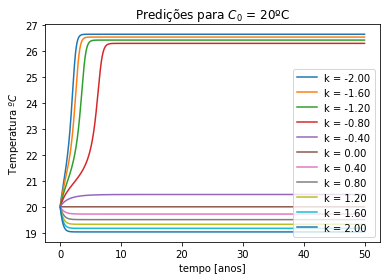

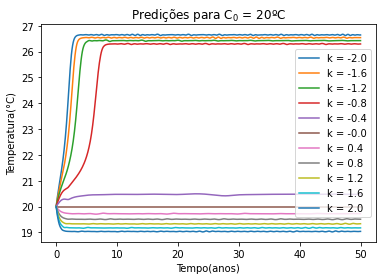

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

def func(t, y, k):
  return 1/10 * (y - 20)*(22 - y)*(y - 26) - k

def runge_kutta_45(f,t,y0,ks):
  t = [i for i in np.arange(0,50+0.1,0.1)]
  results = {}
  for k in ks :
    results[k] = solve_ivp(f, [0,50], y0, args=(k,),method='RK45', t_eval=t)
  return results

y0 = [20,]
ks = np.arange(-2,2.4,0.4).round(1)
tempos = [i for i in np.arange(0,50+0.1,0.1)]
solucoes = runge_kutta_45(func,tempos,y0,ks)

for i in range(len(y0)):
  for k in ks:
    plt.plot(tempos,solucoes[k].y[i], label = f'k = {k}')
  plt.title('Predições para C$_{0}$ = '+str(y0[i])+"ºC")
  plt.xlabel('Tempo(anos)')
  plt.ylabel('Temperatura(°C)')
  plt.legend()
  plt.show()

## Parte 2:
***(4pt)***


Modifique o programa anterior para ser um **módulo**.

Em um novo programa, chame o módulo para obter a solução da equação diferencial para um conjunto de valores variados de $k$ e $C_0$ em uma "_rede_", isto quer dizer, percorrendo valores de  $k \in [k_{min},k_{max}]$ e $ C_0 \in [C_0^{min},C_0^{max}]$ em intervalos regulares.

A **temperatura de equilibrio** ($T_{fin}$) é aquela que se mantem relativamente estável após um certo intervalo. Para determiná-la, escreva no seu programa um algoritmo que ache este valor e o tempo necessário para chegar nele (quantitativamente). 

Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$ ou qualquer outra relação relevante (justifique). 

_Dica 1: o gráfico $T_{fin}$ vs. $k$ é chamado de diagrama de bifurcação e pode ser usado para responder algumas perguntas da parte 3._

_Dica 2: pode ser usado o gráfico de dispersão `scatter` a opção `c=z` com `cmap` do matplotlib [site](https://matplotlib.org/stable/tutorials/colors/colormaps.html)._

```python
plt.scatter(x,y,c=z,cmap="rainbow")
```



 



In [ ]:
%%writefile integrador.py

import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

def runge_kutta_45(f,t,y0,ks):
  """
  Parameters
    ----------
    f : EDO a se integrada
    t : lista contendo os tempos
    y0 : lista de temperaturas iniciais
    ks: lista de medidas de regulamentação
    
  Returns
    ----------
    Dicionario com as soluções para cada k e seus respctivos valores inicias 
    de temperatura
  
  Example
    ----------
    def func(t, y, k):
    return 1/10 * (y - 20)*(22 - y)*(y - 26) - k
  
    y0 = [20]
    ks = np.arange(-2,2.4,0.4).round(1)
    tempos = [i for i in np.arange(0,50+0.1,0.1)]
    solucoes = runge_kutta_45(func,tempos,y0,ks)

    for i in range(len(y0)):
      for k in ks:
        plt.plot(tempos,solucoes[k].y[i], label = f'k = {k}')
      plt.title('Predições para C$_{0}$ = '+str(y0[i])+"ºC")
      plt.xlabel('Tempo(anos)')
      plt.ylabel('Temperatura(°C)')
      plt.legend()
      plt.show()
  """
  results = {}
  for k in ks :
    results[k] = solve_ivp(f, [t[0],t[-1]], y0, args=(k,),method='RK45', t_eval=t)
  return results

if __name__ == '__main__':
  def func(t, y, k):
    return 1/10 * (y - 20)*(22 - y)*(y - 26) - k
  
  y0 = [20]
  ks = np.arange(-2,2.4,0.4).round(1)
  tempos = [i for i in np.arange(0,50+0.1,0.1)]
  solucoes = runge_kutta_45(func,tempos,y0,ks)

  for i in range(len(y0)):
    for k in ks:
      plt.plot(tempos,solucoes[k].y[i], label = f'k = {k}')
    plt.title('Predições para C$_{0}$ = '+str(y0[i])+"ºC")
    plt.xlabel('Tempo(anos)')
    plt.ylabel('Temperatura(°C)')
    plt.legend()
    plt.show()

Overwriting integrador.py


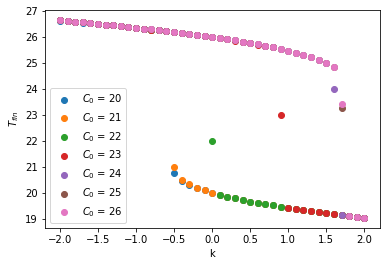

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from integrador import runge_kutta_45

def func(t, y, k):
  return 1/10 * (y - 20)*(22 - y)*(y - 26) - k

y0 = [20,21,22,23,24,25,26]
ks = np.arange(-2,2.1,0.1).round(1)
tempos = [i for i in np.arange(0,50+0.1,0.1)]

solucoes = runge_kutta_45(func,tempos,y0,ks)

equilibrio = {}
for i in range(len(y0)):
  equilibrio[y0[i]] = {}
  for k in ks:
    for m in range(len(tempos)):
      variacao_media_temperatura = 0
      for n in range(50):
        variacao_media_temperatura += ((solucoes[k].y[i][m+n]- solucoes[k].y[i][m])**2)/(50)
      variacao_media_temperatura = variacao_media_temperatura**(1/2)
      if variacao_media_temperatura <= 0.1:
        equilibrio[y0[i]][k] = {"temperatura": round(np.mean(solucoes[k].y[i][m:]),2), "tempo": m/10}
        break

temperatura_equilibrio = {}
for y0i in y0:
  temperatura_equilibrio[y0i] = []
  for k in ks:
    temperatura_equilibrio[y0i].append(equilibrio[y0i][k]["temperatura"])

for y0i in y0:
  plt.scatter(ks, temperatura_equilibrio[y0i], label = f'$C_0$ = {y0i}')
plt.xlabel('k')
plt.ylabel('$T_{fin}$')
plt.legend()
plt.show()

## Parte 3:

***(2pt)***


Responda as perguntas,  apresentando cálculos ou gráficos para justificar as suas respostas.

1. O que acontece com a temperatura de estabilização se a _desregularização_  $k$ (negativo) for menor que $\sim -0.6$ ?

1. O que acontece com a temperatura de estabilização se a _regularização_ $k$ (positivo) for maior que $\sim 1.8 $ ?

1. Se $k$ for mantido em 0, o que acontece com a temperatura final para um valor de temperatura inicial $C_0 = 22ºC$ ?  e se este valor flutuar em 0.1º para cima?

1. Modifique seu programa para simular a seguinte situação, começamos com uma temperatura de $21ºC$ e $k=-0.5$, depois de 5 anos a regulamentação e relaxada ainda mais, com $k=-0.6$.

   a) Qual a temperatura no equador no momento da transição de $k=-0.5$ a $k=-0.6$?

   b) Qual a tendência  da temperatura (ou seja, desce ou sobe) 5 anos após a mudança?

   c) Qual o valor mínimo de $k$ a partir desse momento (10 anos após o começo) para que a temperatura do equador não aumente nos próximos 50 anos?


1. Para valores de k < 0,6, é possivel observar no gráfico $T_{fin}$ x $k$ que são obtidos apenas valores de temperatura estáveis

2. Para valores de k > 1.8, é possivel observar no gráfico $T_{fin}$ x $k$ que são obtidos apenas valores de temperatura estáveis

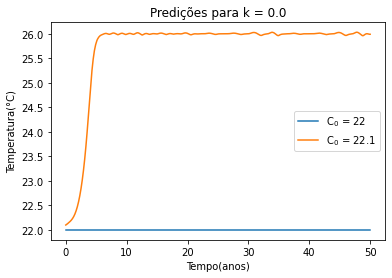

In [ ]:
y0 = [22,22.1]
ks = [0.0]
tempos = [i for i in np.arange(0,50+0.1,0.1)]
solucoes = runge_kutta_45(func,tempos,y0,ks)

for i in range(len(y0)):
  for k in ks:
    plt.plot(tempos,solucoes[k].y[i], label = f'C$_0$ = {y0[i]}')
plt.title(f'Predições para k = {k}')
plt.xlabel('Tempo(anos)')
plt.ylabel('Temperatura(°C)')
plt.legend()
plt.show()

3. Para $k=0$, a temperatura final permanece constante e , quando o valor da temperatura inicial flutua de $+0.1 °C$, a temperatura final aumenta para $~26°C$

In [ ]:
y0 = [21]
ks = [-0.5,-0.6]
tempos = [i for i in np.arange(0,60+0.1,0.1)]
solucoes = runge_kutta_45(func,tempos,y0,ks)

print(f"k = {-0.5}. Temperatura após 5 anos ~ {solucoes[-0.5].y[0][50]:.2f}")
print(f"k = {-0.6}. Temperatura após 5 anos ~ {solucoes[-0.6].y[0][50]:.2f}")

k = -0.5. Temperatura após 5 anos ~ 21.00
k = -0.6. Temperatura após 5 anos ~ 22.30


4. a) Nesta mudança de k, a temperatura no equador salta para o valor aproximado de 22.3 °C

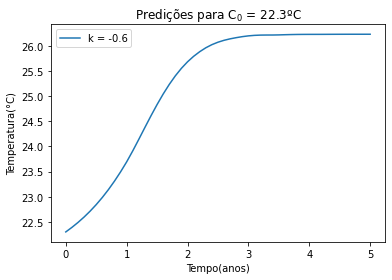

k = -0.6. Temperatura após 5 anos ~ 26.23


In [ ]:
y0 = [22.3]
ks = [-0.6]
tempos = [i for i in np.arange(0,5+0.1,0.1)]
solucoes = runge_kutta_45(func,tempos,y0,ks)

for i in range(len(y0)):
  for k in ks:
    plt.plot(tempos,solucoes[k].y[i], label = f'k = {k}')
  plt.title('Predições para C$_{0}$ = '+str(y0[i])+"ºC")
  plt.xlabel('Tempo(anos)')
  plt.ylabel('Temperatura(°C)')
  plt.legend()
  plt.show()

print(f"k = {-0.6}. Temperatura após 5 anos ~ {solucoes[-0.6].y[0][50]:.2f}")

4. b) A temperatura tende subir

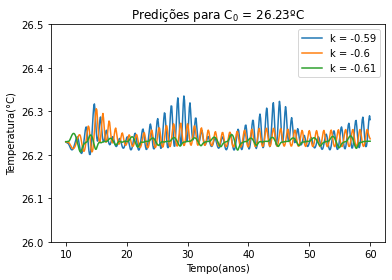

In [ ]:
y0 = [26.23]
ks = [-0.59,-0.6,-0.61]
tempos = [i for i in np.arange(10,60+0.1,0.1)]
solucoes = runge_kutta_45(func,tempos,y0,ks)

for i in range(len(y0)):
  for k in ks:
    plt.plot(tempos,solucoes[k].y[i], label = f'k = {k}')
  plt.title('Predições para C$_{0}$ = '+str(y0[i])+"ºC")
  plt.xlabel('Tempo(anos)')
  plt.ylabel('Temperatura(°C)')
  plt.ylim(ymin = 26,ymax = 26.5) # (minimo,maximo)
  plt.legend()
  plt.show()

4. c) O valor mínimo de $k$ a partir de  $t=10$ que possui uma menor variação da temperatura de estabilidade, ou seja, uma maior confiabilidade para que a temperatura não aumente nos proximos 50 anos, é  $k=−0.61$